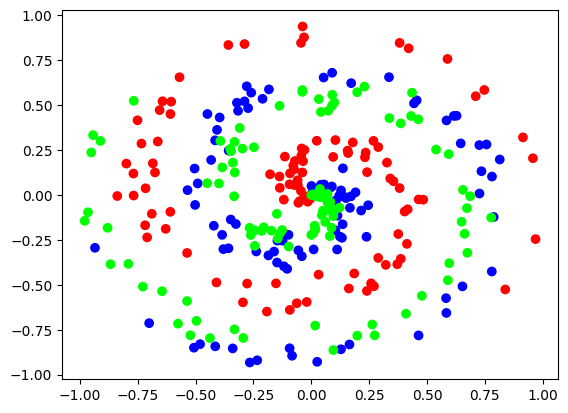

In [2]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

In [3]:
from Dense_Layer import Layer_Dense
from ReLU_Act import Activation_ReLU
from SGD_optimizer import Optimizer_SGD
from Softmax_Act import Activation_Softmax
from Cat_Crossentropy_Loss import Loss_Categorical_Crossentropy
from softmax_loss_catcrossentropy import Activation_Softmax_Loss_CategoricalCrossentropy
from ADAGRAD_optimizer import Optimizer_Adagrad
from RMSProp_optimizer import Optimizer_RMSprop
from Adam_optimizer import Optimizer_Adam

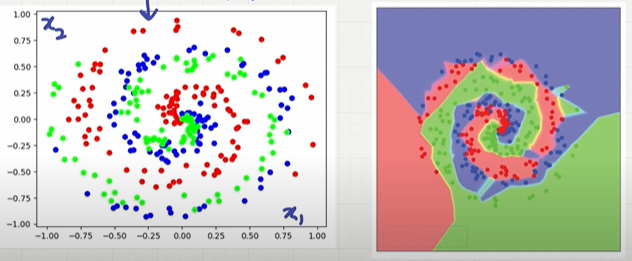

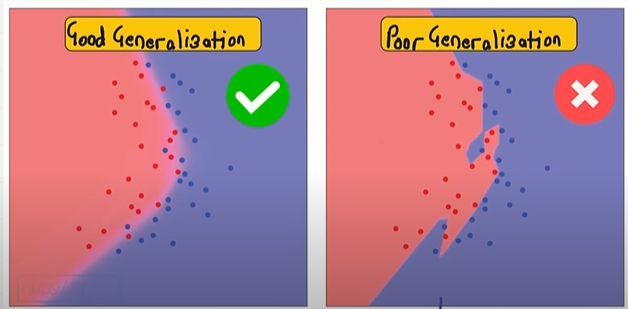

#ADAM: 0.957
#RMSPROP: 0.717
#MOMENTUM: 0.873

In [4]:
import numpy as np
# Validate the model
# Create test dataset
X_test, y_test = spiral_data(samples=100, classes=3)
# Perform a forward pass of our testing data through this layer
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

dense1.forward(X_test)
# Perform a forward pass through activation function
# takes the output of first dense layer here
activation1.forward(dense1.output)
# Perform a forward pass through second Dense layer
# takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through the activation/loss function
# takes the output of second dense layer here and returns loss
loss = loss_activation.forward(dense2.output, y_test)
# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(loss_activation.output, axis=1)
if len(y_test.shape) == 2:
 y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test)
print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

validation, acc: 0.343, loss: 1.099
